Importing The proper packages

Problem Statement: Your task is to help small women-owned and minority ownedc businesses secure Environmental Protection Agency contract awards

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

Data cleaning

In [ ]:
df = pd.read_csv('FY2023_068_Contracts_Full_20240214_1.csv', low_memory=False)

In [ ]:
df.shape

(12542, 297)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(thresh=len(df.columns)*0.8, inplace=True)
df.dropna(axis=1,thresh=len(df)*0.75,inplace=True)

In [ ]:
df = df.replace({'t': 1, 'f': 0})

In [ ]:
daf = df.copy()

daf = daf.drop(minority_women.index)
daf = daf.drop(minority.index)
daf = daf.drop(non_minority_women.index)
daf = daf.drop(women.index)

In [ ]:
minority_women = daf.loc[(daf['women_owned_small_business'] == 1) & (daf['minority_owned_business'] == 1)]
minority = daf.loc[(daf['women_owned_small_business'] == 1)]
women = daf.loc[(daf['minority_owned_business'] == 1)]
exclude_condition = (daf['women_owned_small_business'] == 1) | (daf['minority_owned_business'] == 1)
daf = daf.loc[~exclude_condition]

Data Aggregation

In [ ]:
yes = minority_women.groupby('recipient_state_code')['potential_total_value_of_award'].agg(['mean','count'])

In [ ]:
no = daf.groupby('recipient_state_code')['potential_total_value_of_award'].agg(['mean','count'])

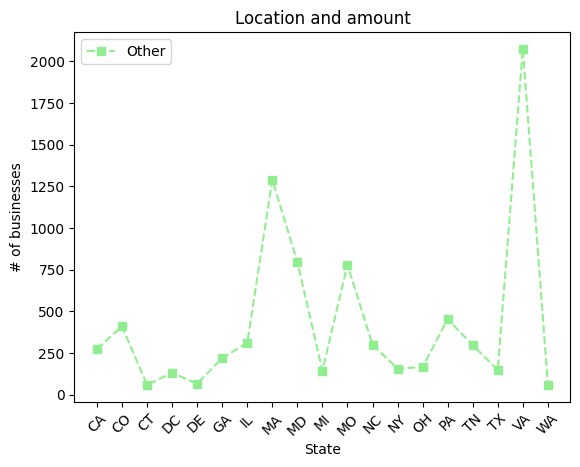

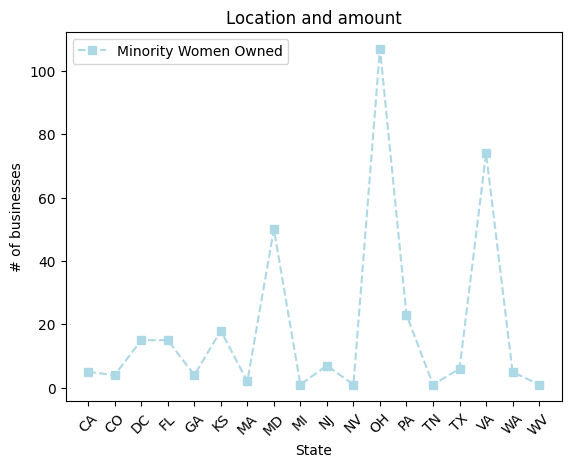

In [ ]:
states = yes.index

no_filtered = no[no['count'] > 50]

plt.plot(no_filtered.index, no_filtered['count'], label='Other', linestyle='--', marker='s', color='lightgreen')

plt.legend()
plt.xlabel('State')
plt.ylabel('# of businesses')
plt.title('Location and amount')
plt.xticks(rotation=45)
plt.show()

plt.plot(states, yes['count'], label='Minority Women Owned', linestyle='--', marker='s', color='lightblue')

plt.legend()
plt.xlabel('State')
plt.ylabel('# of businesses')
plt.title('Location and amount')
plt.xticks(rotation=45)
plt.show()


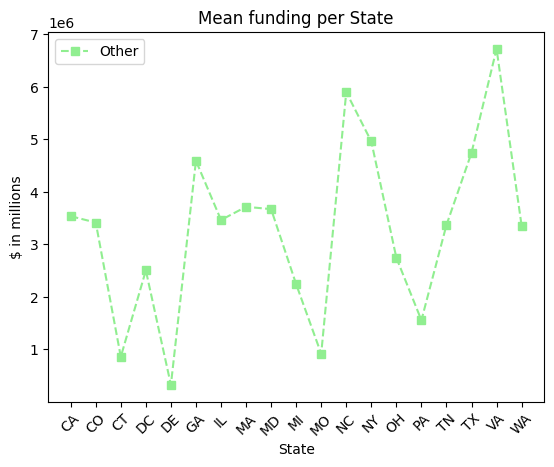

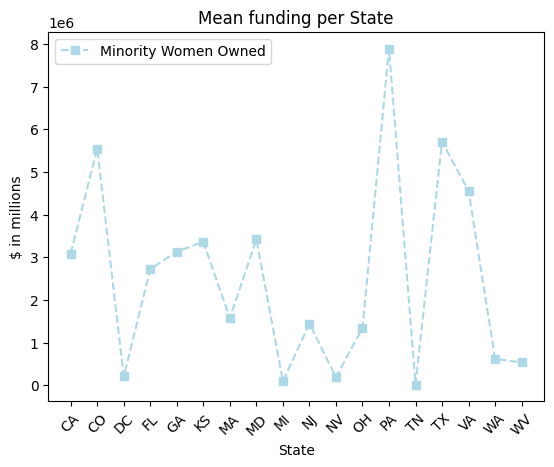

In [ ]:
states = yes.index

no_filtered = no[no['count'] > 50]

plt.plot(no_filtered.index, no_filtered['mean'], label='Other', linestyle='--', marker='s', color='lightgreen')

plt.legend()
plt.xlabel('State')
plt.ylabel('$ in millions')
plt.title('Mean funding per State')
plt.xticks(rotation=45)
plt.show()

plt.plot(states, yes['mean'], label='Minority Women Owned', linestyle='--', marker='s', color='lightblue')

plt.legend()
plt.xlabel('State')
plt.ylabel('$ in millions')
plt.title('Mean funding per State')
plt.xticks(rotation=45)
plt.show()
